In [1]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 200

In [3]:
with open("fer2013.csv") as f:
  content = f.readlines()

In [4]:
lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [5]:
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
      print("", end="")

In [6]:
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

28709 train samples
3589 test samples


In [7]:
#construct CNN structure
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [8]:
#Compile model
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [9]:
#train model
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          shuffle=True)

#Save model
model.save('mode200.h5')

Epoch 1/200
113/113 [==============================] - 98s 864ms/step - loss: 1.8203 - accuracy: 0.2452 - val_loss: 1.8150 - val_accuracy: 0.2494
Epoch 2/200
113/113 [==============================] - 95s 839ms/step - loss: 1.7963 - accuracy: 0.2548 - val_loss: 1.7291 - val_accuracy: 0.2853
Epoch 3/200
113/113 [==============================] - 94s 832ms/step - loss: 1.6788 - accuracy: 0.3253 - val_loss: 1.5902 - val_accuracy: 0.3653
Epoch 4/200
113/113 [==============================] - 94s 835ms/step - loss: 1.5638 - accuracy: 0.3817 - val_loss: 1.5037 - val_accuracy: 0.4132
Epoch 5/200
113/113 [==============================] - 95s 842ms/step - loss: 1.4801 - accuracy: 0.4237 - val_loss: 1.4796 - val_accuracy: 0.4333
Epoch 6/200
113/113 [==============================] - 96s 846ms/step - loss: 1.4269 - accuracy: 0.4468 - val_loss: 1.4181 - val_accuracy: 0.4475
Epoch 7/200
113/113 [==============================] - 97s 856ms/step - loss: 1.3626 - accuracy: 0.4742 - val_loss: 1.3769 -

Epoch 57/200
113/113 [==============================] - 98s 864ms/step - loss: 0.1512 - accuracy: 0.9472 - val_loss: 3.1773 - val_accuracy: 0.5620
Epoch 58/200
113/113 [==============================] - 97s 859ms/step - loss: 0.1940 - accuracy: 0.9325 - val_loss: 3.0591 - val_accuracy: 0.5729
Epoch 59/200
113/113 [==============================] - 97s 863ms/step - loss: 0.1456 - accuracy: 0.9483 - val_loss: 3.2241 - val_accuracy: 0.5578
Epoch 60/200
113/113 [==============================] - 97s 861ms/step - loss: 0.1319 - accuracy: 0.9547 - val_loss: 3.2174 - val_accuracy: 0.5670
Epoch 61/200
113/113 [==============================] - 97s 861ms/step - loss: 0.1662 - accuracy: 0.9408 - val_loss: 3.0839 - val_accuracy: 0.5692
Epoch 62/200
113/113 [==============================] - 97s 858ms/step - loss: 0.1330 - accuracy: 0.9535 - val_loss: 3.2922 - val_accuracy: 0.5614
Epoch 63/200
113/113 [==============================] - 97s 860ms/step - loss: 0.1440 - accuracy: 0.9496 - val_loss: 3

113/113 [==============================] - 97s 856ms/step - loss: 0.0699 - accuracy: 0.9760 - val_loss: 4.2492 - val_accuracy: 0.5709
Epoch 113/200
113/113 [==============================] - 97s 857ms/step - loss: 0.0554 - accuracy: 0.9807 - val_loss: 4.4178 - val_accuracy: 0.5701
Epoch 114/200
113/113 [==============================] - 97s 856ms/step - loss: 0.0743 - accuracy: 0.9742 - val_loss: 4.0735 - val_accuracy: 0.5770
Epoch 115/200
113/113 [==============================] - 97s 855ms/step - loss: 0.0534 - accuracy: 0.9822 - val_loss: 4.4502 - val_accuracy: 0.5595
Epoch 116/200
113/113 [==============================] - 97s 858ms/step - loss: 0.0710 - accuracy: 0.9747 - val_loss: 4.2470 - val_accuracy: 0.5656
Epoch 117/200
113/113 [==============================] - 97s 854ms/step - loss: 0.0607 - accuracy: 0.9782 - val_loss: 4.4256 - val_accuracy: 0.5729
Epoch 118/200
113/113 [==============================] - 97s 857ms/step - loss: 0.0596 - accuracy: 0.9797 - val_loss: 4.3138 -

113/113 [==============================] - 96s 852ms/step - loss: 0.0325 - accuracy: 0.9885 - val_loss: 4.8913 - val_accuracy: 0.5715
Epoch 168/200
113/113 [==============================] - 96s 850ms/step - loss: 0.0594 - accuracy: 0.9800 - val_loss: 4.7098 - val_accuracy: 0.5770
Epoch 169/200
113/113 [==============================] - 96s 853ms/step - loss: 0.0388 - accuracy: 0.9860 - val_loss: 5.1083 - val_accuracy: 0.5782
Epoch 170/200
113/113 [==============================] - 96s 851ms/step - loss: 0.0584 - accuracy: 0.9799 - val_loss: 4.7687 - val_accuracy: 0.5729
Epoch 171/200
113/113 [==============================] - 96s 853ms/step - loss: 0.0470 - accuracy: 0.9841 - val_loss: 4.8174 - val_accuracy: 0.5670
Epoch 172/200
113/113 [==============================] - 96s 854ms/step - loss: 0.0528 - accuracy: 0.9816 - val_loss: 4.7211 - val_accuracy: 0.5698
Epoch 173/200
113/113 [==============================] - 96s 851ms/step - loss: 0.0455 - accuracy: 0.9847 - val_loss: 4.9118 -

In [10]:
#Evaluation
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

Train loss: 0.01950017176568508
Train accuracy: 99.36605095863342
Test loss: 5.179028034210205
Test accuracy: 56.589579582214355


In [14]:
#function for drawing bar chart for emotion preditionsc
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

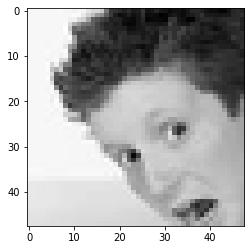

[9.9678230e-01 1.1398197e-10 3.1343733e-03 6.8856760e-05 1.4386930e-05
 1.3198954e-07 1.8766313e-09]


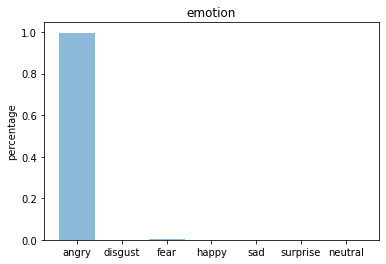

----------------------------------------------


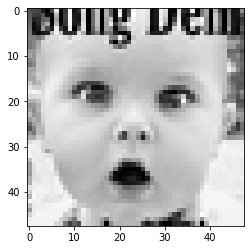

[1.63533429e-24 0.00000000e+00 7.26407880e-21 1.01025014e-20
 1.30579941e-37 1.00000000e+00 1.96316359e-29]


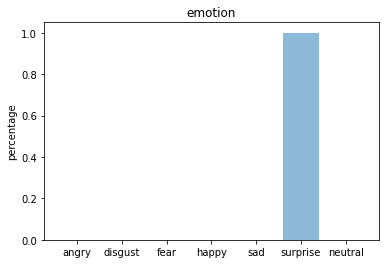

----------------------------------------------


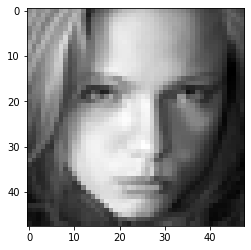

[7.9125624e-05 5.1092793e-11 1.1880037e-05 2.2795349e-02 1.6776420e-01
 5.6532964e-12 8.0934942e-01]


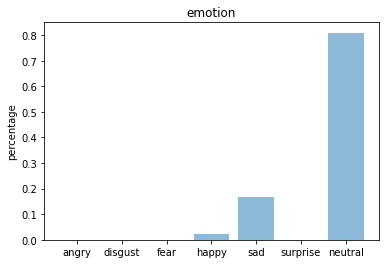

----------------------------------------------


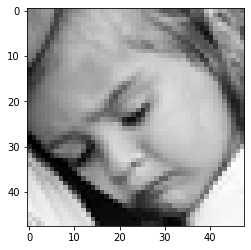

[2.7893304e-12 2.1513620e-19 8.1204683e-01 9.2974049e-12 1.8794431e-01
 7.9094943e-06 9.1171648e-07]


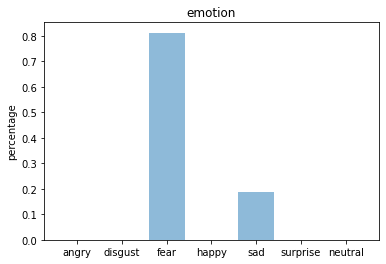

----------------------------------------------


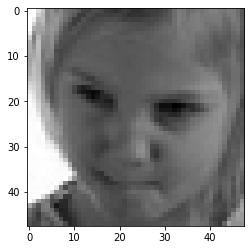

[8.4395134e-01 2.6913216e-11 3.1644038e-05 6.1077668e-07 1.5601633e-01
 2.1840959e-16 6.1647167e-11]


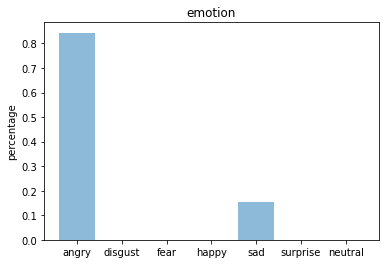

----------------------------------------------


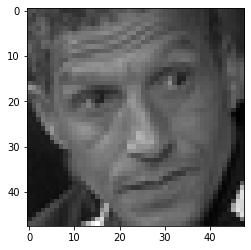

[1.7432100e-06 3.5552835e-19 5.4354705e-11 4.2982098e-12 6.2324200e-04
 1.1898665e-13 9.9937505e-01]


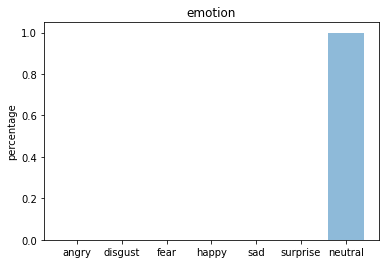

----------------------------------------------


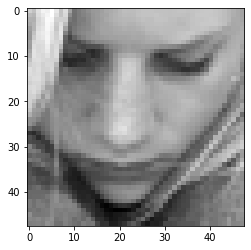

[1.1037491e-06 4.3461488e-20 2.4688199e-05 3.8079942e-10 9.9997425e-01
 3.0968344e-21 8.9890646e-09]


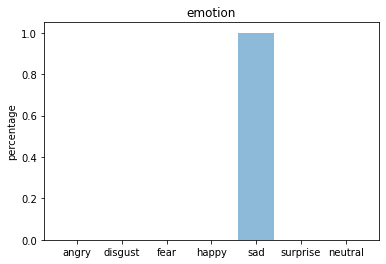

----------------------------------------------


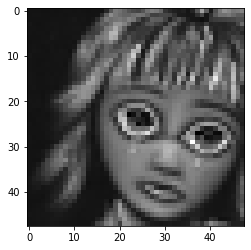

[3.4623820e-02 1.1090676e-11 9.2748407e-04 2.6366335e-05 8.6433213e-04
 4.7401802e-04 9.6308398e-01]


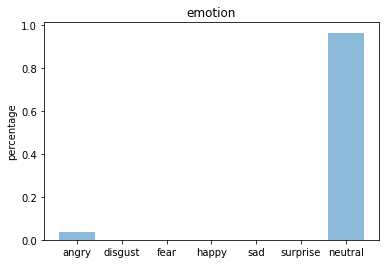

----------------------------------------------


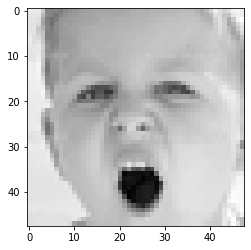

[9.6587079e-05 6.4240746e-20 1.3045941e-06 1.5350172e-07 8.0244662e-20
 9.9990189e-01 6.7986996e-20]


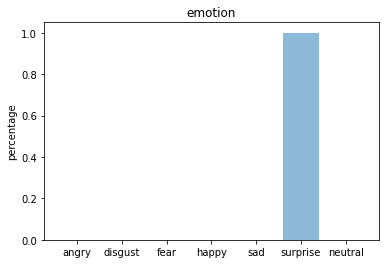

----------------------------------------------


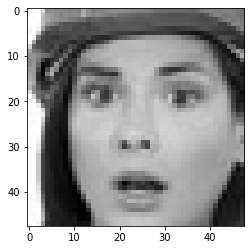

[9.7818108e-11 1.7975826e-14 3.2650769e-07 5.4465108e-13 6.0500179e-06
 9.9999356e-01 3.7594948e-08]


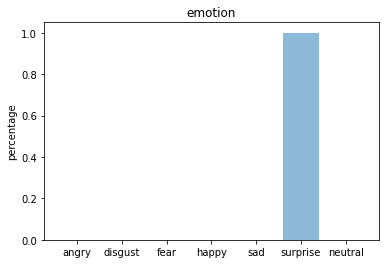

----------------------------------------------


In [15]:
#test on the test set
monitor_testset_results = True

if monitor_testset_results == True:
    #make predictions for test set
    predictions = model.predict(x_test)

    index = 0
    for i in predictions:
        if index < 30 and index >= 20:
            #print(i) #predicted scores
            #print(y_test[index]) #actual scores

            testing_img = np.array(x_test[index], 'float32')
            testing_img = testing_img.reshape([48, 48]);

            plt.gray()
            plt.imshow(testing_img)
            plt.show()
            
            print(i)
            emotion_analysis(i)
            print("----------------------------------------------")
        index = index + 1

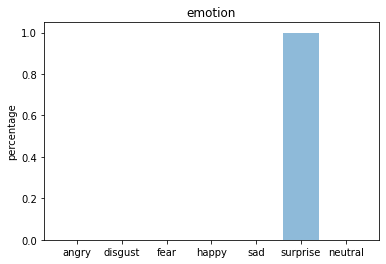

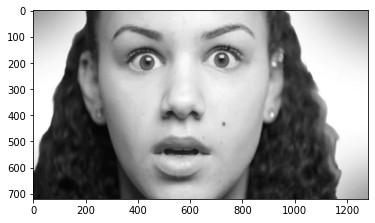

In [29]:
#test on unseen images
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt


file = 'img11.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

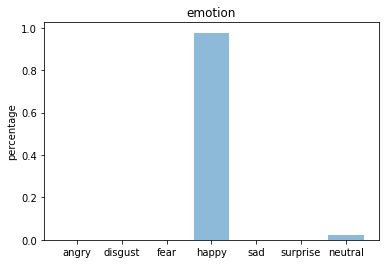

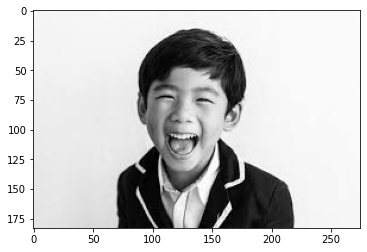

In [37]:
file = 'img13.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

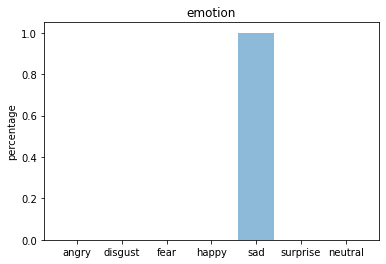

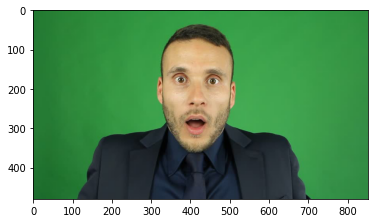

In [30]:
file = 'img9.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

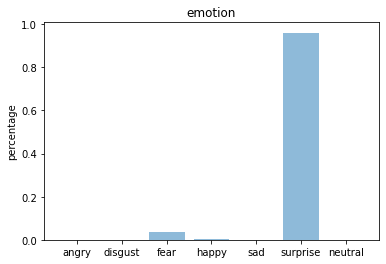

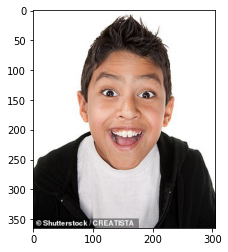

In [34]:
file = 'img5.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

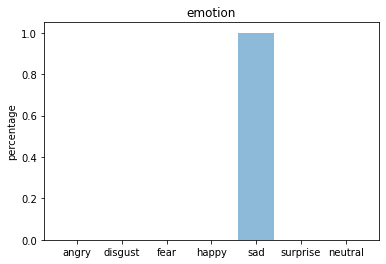

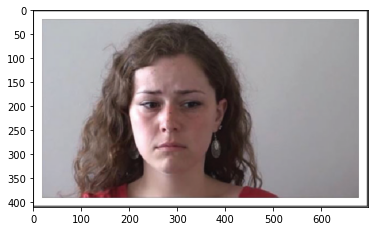

In [35]:
file = 'img6.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()

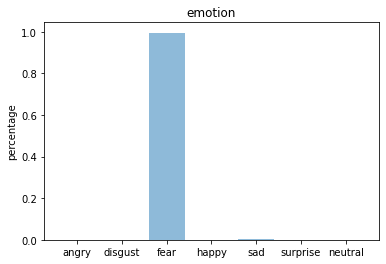

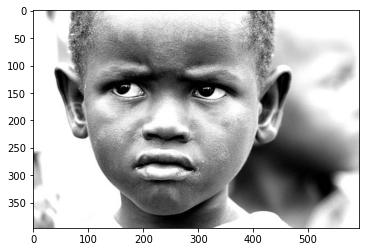

In [38]:
file = 'img14.jpg'
true_image = image.load_img(file)
img = image.load_img(file, grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(true_image)
plt.show()